<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Проверка типов

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.duplicated().sum()

0

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Кодировка

Для исследования можно удалить из таблицы данные о индексе строки, уникальном идентификаторе и фамилии, так как они не могут влиять на результат

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [8]:
new_name = []
for i in data.columns:
    new_name.append(i.lower())
new_name

['creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited']

In [9]:
data.set_axis(new_name, inplace=True, axis=1)
data

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [10]:
data = pd.get_dummies(data, drop_first=True)
data

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [11]:
data = data.dropna()

In [12]:
data['exited'].value_counts() #для проверки баланса

0    7237
1    1854
Name: exited, dtype: int64

## Исследование задачи

In [13]:
features = data.drop('exited', axis=1)
target = data['exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                    target, test_size=0.4, random_state=12345)    


In [14]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,
                                                                           random_state=12345)

In [15]:
target_train = target_train.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

Поиск гиперпараметров для случайного леса в случае дисбаланса классов

In [16]:
best_depth = 0
best_estimators = 0
f1_max = 0
for depth in range(1, 16):
    for estimators in range(2, 20):
        model = RandomForestClassifier(max_depth = depth, n_estimators=estimators, random_state=12345)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_max:
            f1_max=f1
            best_depth = depth
            best_estimators = estimators
print('Best f1: ',f1_max)
print('Best_depth: ', best_depth)
print('Best estimators: ', best_estimators)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

Best f1:  0.5918699186991869
Best_depth:  14
Best estimators:  13


Протестируем логистическую регрессию на тех же данных

In [17]:
def regression_res(features_train, target_train, features_valid):
    model_l = LogisticRegression(random_state=12345)
    model_l.fit(features_train, target_train)
    predictions = model_l.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probability = model_l.predict_proba(features_valid)
    probability_one = probability[:,1]
    print('f1: ',f1)


In [18]:
regression_res(features_train, target_train, features_valid)

f1:  0.07246376811594203


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Значение метрики f1 значительно выше для случайного леса, 0.59 против 0.07

roc-auc для наилучшей модели случайного леса

In [19]:
disb_forest_model = RandomForestClassifier(n_estimators=13, max_depth=14, random_state=12345)
disb_forest_model.fit(features_train, target_train)
probability_one_forest = disb_forest_model.predict_proba(features_valid)[:,1]
fpr_disb_forest, tpr_disb_forest, thresholds_disb_forest = roc_curve(target_valid, probability_one_forest)

In [20]:
def roc_visualisation(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

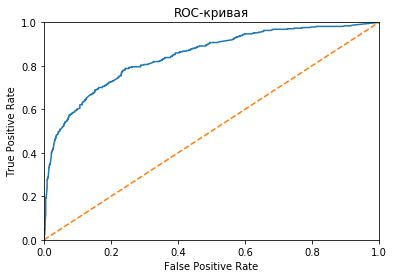

In [21]:
roc_visualisation(fpr_disb_forest, tpr_disb_forest)

In [22]:
print('Roc-auc for random disbalance forest: ', roc_auc_score(target_valid,probability_one_forest))

Roc-auc for random disbalance forest:  0.844999696276348


Roc-auc для логистической регрессии

In [23]:
regression_disb_model = LogisticRegression(random_state=12345)
regression_disb_model.fit(features_train, target_train)
probability_one_regress = model.predict_proba(features_valid)[:,1]
fpr_disb_regress, tpr_disb_regress, thresholds_disb_regress = roc_curve(target_valid, probability_one_regress)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


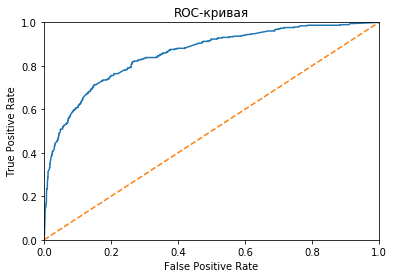

In [24]:
roc_visualisation(fpr_disb_regress, tpr_disb_regress)

In [25]:
print('Roc-auc for disbalance Logistic Regression: ', roc_auc_score(target_valid,probability_one_regress))

Roc-auc for disbalance Logistic Regression:  0.8551054105147288


## Борьба с дисбалансом

In [26]:
data

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


Необходимо провести масшатбирование признаков, так как порядки величин в некоторых столбцах различаются

In [27]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train), columns=features_train.columns)
features_valid = pd.DataFrame(scaler.transform(features_valid), columns=features_valid.columns)
features_test = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns)
features_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,0.809075,-1.039327,-1.025995,0.554904,-0.908179,0.663468,-1.024127,0.019508,-0.582290,-0.572128,-1.107304
1,-1.152518,-1.227561,0.696524,0.480609,-0.908179,-1.507231,-1.024127,0.056167,-0.582290,-0.572128,0.903094
2,-0.398853,0.090079,1.385532,-1.237830,-0.908179,0.663468,0.976442,0.848738,-0.582290,-0.572128,0.903094
3,-0.749875,-0.286389,0.352020,-1.237830,0.809300,0.663468,0.976442,-0.894953,-0.582290,-0.572128,0.903094
4,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,-1.507231,0.976442,-1.284516,-0.582290,-0.572128,0.903094
...,...,...,...,...,...,...,...,...,...,...,...
5449,1.283988,-0.474624,1.730036,0.813031,-0.908179,-1.507231,-1.024127,-1.092767,1.717356,-0.572128,0.903094
5450,0.158652,0.466548,1.041028,1.071609,-0.908179,0.663468,0.976442,0.260842,-0.582290,-0.572128,-1.107304
5451,-1.049276,-0.945210,0.352020,0.449165,-0.908179,0.663468,0.976442,-1.086965,-0.582290,-0.572128,-1.107304
5452,-0.956359,1.219485,1.385532,-1.237830,-0.908179,0.663468,-1.024127,1.288527,-0.582290,-0.572128,-1.107304


Применим технику баланса классов, как аргумент при вызове модели

In [28]:
def balanced_forest_res(features_train, target_train, features_valid, balance):
    best_depth = 0
    best_estimators = 0
    best_f1_ = 0
    for depth in range(2, 17, 1):
        for estimators in range(2, 20):
            if(balance):
                model_f = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=12345,
                                         class_weight='balanced'
                                         )
            else:
                model_f = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=12345)
            model_f.fit(features_train, target_train)
            predictions_valid = model_f.predict(features_valid)
            probability_one = model_f.predict_proba(features_valid)[:,1]
            f1 = f1_score(target_valid, predictions_valid)
            if f1 > best_f1_:
                best_f1_ = f1
                best_depth = depth
                best_estimators = estimators
                best_forest_balanced_model = model_f
    print('f1: ', best_f1_)
    print('Best depth: ', best_depth)
    print('Best estimators: ', best_estimators)

In [29]:
balanced_forest_res(features_train, target_train, features_valid, True)

f1:  0.6444188722669736
Best depth:  7
Best estimators:  13


In [30]:
regression_balanced_model = LogisticRegression(random_state=12345, class_weight='balanced') 
regression_balanced_model.fit(features_train, target_train)
regression_predictions = regression_balanced_model.predict(features_valid)
f1_regression_balance = f1_score(target_valid, regression_predictions)
print(f1_regression_balance)

0.509731232622799


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


При балансировке результаты на регрессии улучшились, но они все равно ниже, чем результаты на случайном лесе 0.64 против 0.50

применение техники upsampling

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_ones = target[target==1]
    target_zeros = target[target==0]
    features_upsample = pd.concat([features_ones]*repeat + [features_zeros])
    target_upsample = pd.concat([target_ones]*repeat + [target_zeros])
    features_upsample, target_upsample = shuffle(features_upsample, target_upsample, random_state=12345)
    return features_upsample, target_upsample

In [32]:
features_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,0.809075,-1.039327,-1.025995,0.554904,-0.908179,0.663468,-1.024127,0.019508,-0.582290,-0.572128,-1.107304
1,-1.152518,-1.227561,0.696524,0.480609,-0.908179,-1.507231,-1.024127,0.056167,-0.582290,-0.572128,0.903094
2,-0.398853,0.090079,1.385532,-1.237830,-0.908179,0.663468,0.976442,0.848738,-0.582290,-0.572128,0.903094
3,-0.749875,-0.286389,0.352020,-1.237830,0.809300,0.663468,0.976442,-0.894953,-0.582290,-0.572128,0.903094
4,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,-1.507231,0.976442,-1.284516,-0.582290,-0.572128,0.903094
...,...,...,...,...,...,...,...,...,...,...,...
5449,1.283988,-0.474624,1.730036,0.813031,-0.908179,-1.507231,-1.024127,-1.092767,1.717356,-0.572128,0.903094
5450,0.158652,0.466548,1.041028,1.071609,-0.908179,0.663468,0.976442,0.260842,-0.582290,-0.572128,-1.107304
5451,-1.049276,-0.945210,0.352020,0.449165,-0.908179,0.663468,0.976442,-1.086965,-0.582290,-0.572128,-1.107304
5452,-0.956359,1.219485,1.385532,-1.237830,-0.908179,0.663468,-1.024127,1.288527,-0.582290,-0.572128,-1.107304


In [33]:
features_train_upsample, target_train_upsample = upsample(features_train, target_train, 4)
features_train_upsample.shape

(8832, 11)

In [34]:
balanced_forest_res(features_train_upsample, target_train_upsample, features_valid, False)

f1:  0.6289655172413793
Best depth:  15
Best estimators:  17


In [35]:
regression_res(features_train_upsample, target_train_upsample, features_valid)

f1:  0.5081374321880651


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Применение техники upsample не улучшило имеющиеся результаты для случайного леса, но улучшило для регрессии

Применение техники downsample

In [36]:
def downsample(features, target):
    features_zeros = features[target==0].sample(frac=0.4, random_state=12345)
    target_zeros = target[target==0].sample(frac=0.4, random_state=12345)
    features_ones = features[target==1]
    target_ones = target[target==1]
    features_downsample = pd.concat([features_zeros] + [features_ones])
    target_downsample = pd.concat([target_zeros] + [target_ones])
    features_downsample, target_downsample = shuffle(features_downsample, target_downsample, random_state=12345)
    return features_downsample, target_downsample

In [37]:
features_train_downsample, target_train_downsample = downsample(features_train, target_train)
features_train_downsample.shape

(2857, 11)

In [38]:
balanced_forest_res(features_train_downsample, target_train_downsample, features_valid, False)

f1:  0.6421768707482993
Best depth:  4
Best estimators:  13


In [39]:
regression_res(features_train_downsample, target_train_downsample, features_valid)

f1:  0.4975609756097561


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Наилучший результат по метрике f1 показала модель случайного леса с оценкой баланса класса, ее значение метрики f1=0.644, также хороший результат показала модель, обученная на основе случайного леса и техники downsample f1=0.642

Roc-auc для взвешенных классов

In [40]:
def forest_model(features_train, target_train, estimators, depth, weight):
    if weight:
        model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, random_state=12345, 
                                       class_weight='balanced')
    else:
        model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, random_state=12345)                                     
    model.fit(features_train, target_train)
    return model

In [41]:
def regression_model(features_train, target_train, weight):
    if weight:
        model = LogisticRegression(class_weight='balanced', random_state=12345)
    else:
        model = LogisticRegression(random_state=12345)
    model.fit(features_train, target_train)
    return model

In [42]:
weight_forest_model = forest_model(features_train, target_train,13, 7, True)
probability_one_weight_forest = weight_forest_model.predict_proba(features_valid)[:,1]
fpr_weight_forest, tpr_weight_forest, thresholds_weight_forest = roc_curve(target_valid,probability_one_weight_forest)

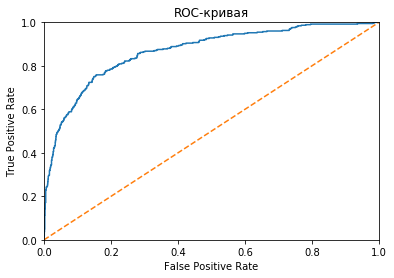

In [43]:
roc_visualisation(fpr_weight_forest, tpr_weight_forest)

In [44]:
print('Roc-auc for random weight forest: ', roc_auc_score(target_valid,probability_one_weight_forest))

Roc-auc for random weight forest:  0.8676077804795889


In [45]:
weight_regression_model = regression_model(features_train, target_train, True)
probability_one_weight_regression = weight_regression_model.predict_proba(features_valid)[:,1]
fpr_weight_regression, tpr_weight_regression, thresholds_weight_regression = roc_curve(target_valid, 
                                                                                       probability_one_weight_regression)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


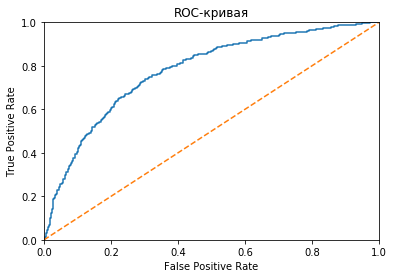

In [46]:
roc_visualisation(fpr_weight_regression, tpr_weight_regression)

In [47]:
print('Roc-auc for weight logistic regression : ', roc_auc_score(target_valid,probability_one_weight_regression))

Roc-auc for weight logistic regression :  0.7777515982306715


Roc-auc для upsampling

In [48]:
upsampling_forest_model = forest_model(features_train_upsample, target_train_upsample, 17, 15, False)
probability_one_upsampling_forest = upsampling_forest_model.predict_proba(features_valid)[:,1]
fpr_upsampling_forest, tpr_upsampling_forest, thresholds_upsampling_foret = roc_curve(target_valid, 
                                                                                      probability_one_upsampling_forest)

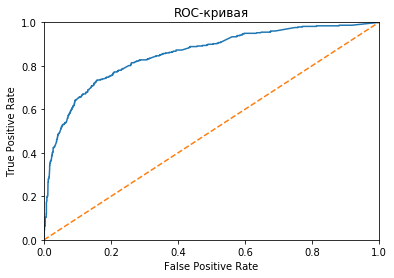

In [49]:
roc_visualisation(fpr_upsampling_forest, tpr_upsampling_forest)

In [50]:
print('Roc-auc for upsample random forest: ', roc_auc_score(target_valid,probability_one_upsampling_forest))

Roc-auc for upsample random forest:  0.853727609584414


In [51]:
upsampling_regress_model = regression_model(features_train_upsample, target_train_upsample, False)
probability_one_upsampling_regress = upsampling_regress_model.predict_proba(features_valid)[:,1]
fpr_upsampling_regress, tpr_upsampling_regress, thresholds_upsampling_regress = roc_curve(target_valid,
                                                                                         probability_one_upsampling_regress
                                                                                         )

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


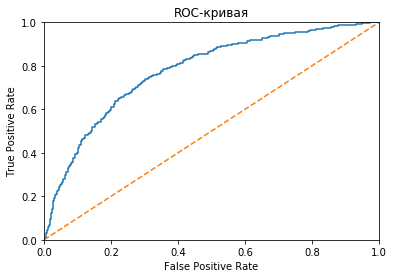

In [52]:
roc_visualisation(fpr_upsampling_regress, tpr_upsampling_regress)

In [53]:
print('Roc-auc for upsample logistic regression : ', roc_auc_score(target_valid,probability_one_upsampling_regress))

Roc-auc for upsample logistic regression :  0.777854680197402


Roc-auc для downsample

In [54]:
downsampling_forest_model = forest_model(features_train_downsample, target_train_downsample, 13, 4, False)
probability_one_downsampling_forest = downsampling_forest_model.predict_proba(features_valid)[:,1]
fpr_downsampling_forest, tpr_downsampling_forest, thresholds_downsampling_forest = roc_curve(target_valid, 
                                                                                      probability_one_downsampling_forest)

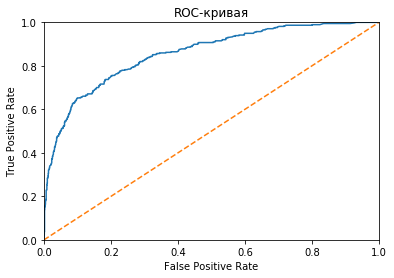

In [55]:
roc_visualisation(fpr_downsampling_forest, tpr_downsampling_forest)

In [56]:
print('Roc-auc for downsample random forest: ', roc_auc_score(target_valid,probability_one_downsampling_forest))

Roc-auc for downsample random forest:  0.8565375135525175


In [57]:
downsampling_regress_model = regression_model(features_train_downsample, target_train_downsample, False)
probability_one_downsampling_regress = downsampling_regress_model.predict_proba(features_valid)[:,1]
fpr_downsampling_regress, tpr_downsampling_regress, thresholds_downsampling_regress = roc_curve(target_valid,
                                                                                    probability_one_downsampling_regress
                                                                                         )

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


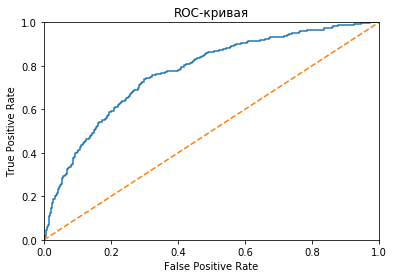

In [58]:
roc_visualisation(fpr_downsampling_regress, tpr_downsampling_regress)

In [59]:
print('Roc-auc for downsample logistic regression : ', roc_auc_score(target_valid,probability_one_downsampling_regress))

Roc-auc for downsample logistic regression :  0.7712905678159693


## Тестирование модели

In [60]:
favorite_model = RandomForestClassifier(n_estimators=13, max_depth=7, random_state=12345, class_weight='balanced')
favorite_model.fit(features_train, target_train)
predictions = favorite_model.predict(features_test)
f1_metrics = f1_score(target_test, predictions)
print(f1_metrics)

0.5955334987593052


Исследование auc-roc для наилучшей модели

In [61]:
probability_one = favorite_model.predict_proba(features_test)[:,1]

In [62]:
fpr, tpr, thresholds = roc_curve(target_test, probability_one)

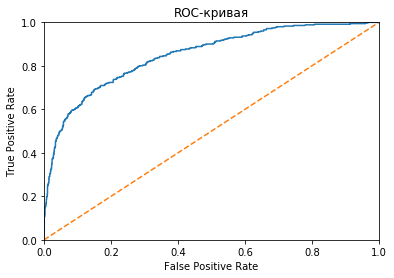

In [63]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [64]:
favorite_roc_auc = roc_auc_score(target_test,probability_one)
favorite_roc_auc

0.8487359975779595

Наилучшая модель показала на тестовой выборке такие результаты: f1=0.595, roc_auc=0.84

Общий вывод: Было исследовано несколько различных моделей, качество которых оценивалось по метрике f1, в первых двух моделях не был учтен дисбаланс классов, поэтому получились такие результаты: f1 модели, обученной на основе случайного леса = 0.59, f1 модели, обученной на алгоритме логистической регрессии = 0.07. При учете дисбаланса модель обучалась на основе алгоритмов учета важности класса. F1 случайного леса = 0.644, f1 регрессии = 0.50. Применялась техника upsampling, f1 случайного леса = 0.628, f1 регрессии = 0.50. Применялась техника downsampling, f1 случайного леса = 0.628, f1 регрессии = 0.497. На основе этого была выбрана лучшая модель, испытание которой прошло еще на тестовой выборке, результаты по тестовой выбрке такие: f1 = 0.595, roc_auc=0.848

In [65]:
res = [['Random Forest', 0.59, 0.644, 0.628, 0.628],
       ['Logistic Regression', 0.07, 0.50, 0.50, 0.497]
       ]
columns1 = ['model', 'disbalans_f1', 'weight_f1', 'upsampling_f1', 'downsampling_f1']
res_data = pd.DataFrame(data=res, columns=columns1)
res_data

,model,disbalans_f1,weight_f1,upsampling_f1,downsampling_f1
0,Random Forest,0.59,0.644,0.628,0.628
1,Logistic Regression,0.07,0.500,0.500,0.497
